In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Person( object ):
    def __init__( self, pid =0):
        self.pid= pid
        self.status = "Potential"

    def __str__( self):
        msg = 'd,%s'%\
        (self.pid , self.status)
        return msg

    def adopt(self):
        self.status = "Adopt"

    def dispose(self):
        self.status = "Dispose"

In [14]:
class Population( object ):
    """
    simulate a population of Persons
    in a 3 compartment diffusion of innovation model
    """
    def __init__( self, N=100, beta=0.05, gamma=0.03):
        self.N = N
        self.beta = beta
        self.gamma = gamma

        self.num_potentials = self.N
        self.num_adopters = 0
        self.num_disposers = 0

        self.person_list = []
        self.setup()

    def __str__(self):
        msg = " "
        msg = '%d,%g,%g,%g,%g,%g'%\
            (self.N,
             self.beta,
             self.gamma,
             self.num_potentials,
             self.num_adopters,
             self.num_disposers)
        return msg

    def setup(self):
        for i in range(self.N):
            p = Person(pid=i)
            chance = np.random.random()
            if chance < self.beta:
                p.adopt()
                self.num_potentials -= 1
                self.num_adopters += 1
            self.person_list.append(p)


    def model_adoption(self):
        for i in range(self.N):
            p = self.person_list[i]
            if (p.status == "Potential"):
                chance = np.random.random()
                if chance < self.beta:
                    p.adopt()
                    self.num_potentials -= 1
                    self.num_adopters += 1

    def model_disposal(self):
        for i in range(self.N):
            p = self.person_list[i]
            if (p.status == "Adopt"):
                chance = np.random.random()
                if chance < self.gamma:
                    p.dispose()
                    self.num_adopters -= 1
                    self.num_disposers += 1

    def main():
        pass
    if __name__ == '__main__':
        main()
    

In [18]:
class DOI_Model(object):
    def __init__( self, N=500, beta=0.09,\
                  gamma=0.01, max_time =250):

        self.potential_history = []
        self.adoption_history = []
        self.disposal_history = []

        self.N = N
        self.beta = beta
        self.gamma = gamma
        self.max_time = max_time
        self.timespan = range(max_time)

        self.pop = Population(N, beta, gamma)

    def __str__(self):
        msg = 'DOI _Model : %d, %8.2f, %8.2f, %d'%\
        (self.N, self.beta, self.gamma, self.max_time)
        return msg

    def run(self): 
        for time in self.timespan:

            # keep track of what happened
            self.potential_history.append(self.pop.num_potentials)
            self.adoption_history.append(self.pop.num_adopters)
            self.disposal_history.append(self.pop.num_disposers)

            # model population actions
            self.pop.model_adoption()
            self.pop.model_disposal()

    def plot(self):
        #
        # plot results
        #
        plt.plot(self.timespan , self.potential_history , '-b', label="potential")
        plt.plot(self.timespan , self.adoption_history , '-r', label="adopters")
        plt.plot(self.timespan , self.disposal_history , '-g', label="disposers")

        plt.title('diffusion of innovation with random mixing')
        plt.xlabel('time')
        plt.ylabel('adoption rate')

        plt.ylim(0, self.pop.N)
        plt.legend(title="key", loc ='center right')

        plt.show

    

In [34]:
def main():
    model = DOI_Model (N=500, beta=0.09, gamma=0.02, max_time = 250)
    model.run()
    model.plot()

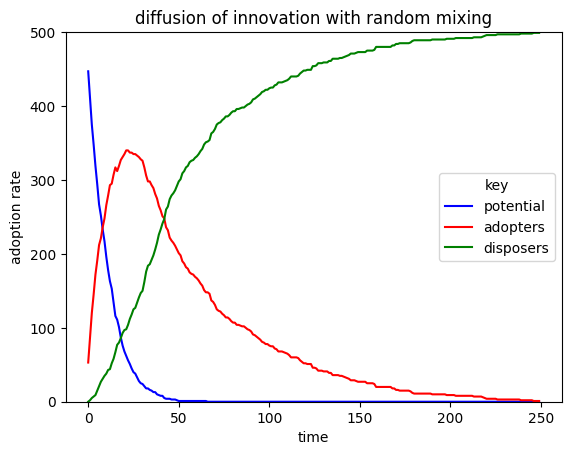

In [35]:
#
# use standard Python idiom
#
if __name__ == '__main__':
    main()